# Comparison of Clasification Models Using Machine Learning to Predict Obesity Level


## Author
**Christian Berdejo Sánchez**


## Dataset
- [Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=)




## Install Dependendencies on venv

Make sure to create a kernel to install dependencies
---
### Requirements
- scikit-learn
- matplotlib
- numpy
- pandas
- ucimlrepo
- ydata-profiling

In [2]:

#Not needed for google Colab
%pip install scikit-learn
%pip install matplotlib
%pip install ucimlrepo



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Needed for Google Collab and local
%pip install ucimlrepo
%pip install  ydata-profiling

 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importing Dataset

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

df_X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
df_y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets



Exploration of data:

In [5]:
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)



{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

**Dataset Description**

This dataset includes data for estimating obesity levels based on individuals' eating habits and physical condition. It contains a total of 2,111 records with 16 features, and the target variable is NObeyesdad, which indicates the level of obesity.

## Data Preprocessing
Categorical data must be replaced with numerical values.
Here are the categorical features and their possible options. Additionally, it's important to note that CAEC and CALC are ordinal variables, so their order must be preserved.

- Gender (Male, Female)
- family_history_with_overweight (yes, no)
- FAVC (yes, no)
- CAEC (no, Sometimes, Frequently, Always)
- SMOKE (yes, no)
- SCC (yes, no)
- CALC (no, Sometimes, Frequently, Always)
- MTRANS (Public_Transportation, Walking, etc.)

We aim to predict the type of obesity based on the remaining parameters:

NObeyesdad (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III)

In [6]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Combine features and target into a single DataFrame for transformations
df = pd.concat([df_X, df_y], axis=1)

# Define ordered categorical columns (Ordinal)
ordinal_cols = {
    "CAEC": ["no", "Sometimes", "Frequently", "Always"],  # Snack consumption between meals
    "CALC": ["no", "Sometimes", "Frequently", "Always"],  # Alcohol consumption
}

# Apply OrdinalEncoder with the correct order of values
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])
df[list(ordinal_cols.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_cols.keys())])

# Save the mapping from original values to numeric for ordinal variables (to display later)
ordinal_mappings = {
    col: {category: index for index, category in enumerate(ordinal_cols[col])}
    for col in ordinal_cols
}

# Define nominal columns for OneHotEncoder
nominal_cols = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS"]

# Apply OneHotEncoder to nominal variables
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = one_hot_encoder.fit_transform(df[nominal_cols])

# Create a DataFrame with the transformed columns
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(nominal_cols))

# Apply LabelEncoder for the target variable (NObeyesdad)
label_encoder = LabelEncoder()
df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])

# Save the mapping of target variable classes to their numbers (to display later)
target_mapping = {category: index for index, category in enumerate(label_encoder.classes_)}

# Save the OneHotEncoder mapping for nominal variables
one_hot_mappings = {}
for col, categories in zip(nominal_cols, one_hot_encoder.categories_):
    one_hot_mappings[col] = {category: i for i, category in enumerate(categories) if category != categories[0]}

# Concatenate the encoded variables with the original numerical columns
df = df.drop(columns=nominal_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# Display the transformed dataset
df


,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,1.0,2.000000,0.000000,1.000000,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,1.0,3.000000,3.000000,0.000000,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,1.0,2.000000,2.000000,1.000000,2.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,1.0,2.000000,2.000000,0.000000,2.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,1.0,2.000000,0.000000,0.000000,1.0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.0,1.728139,1.676269,0.906247,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,1.0,2.005130,1.341390,0.599270,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,1.0,2.054193,1.414209,0.646288,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,1.0,2.852339,1.139107,0.586035,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Attention:
When applying One-Hot Encoding, each category becomes a new column with binary values (0 or 1). For example, Gender would be transformed into Gender_Female and Gender_Male. However, this creates redundancy, since knowing the values of all but one column allows us to infer the missing one.

To avoid this issue, we can use `drop='first'`, which removes the first category and results in something like:

#### Original Table (Gender Category)
<table>
    <tr>
        <th>Gender</th>
    </tr>
    <tr>
        <td>Female</td>
    </tr>
    <tr>
        <td>Male</td>
    </tr>
</table>

#### OneHotEncoder without drop='first' (All categories)
<table>
    <tr>
        <th>Gender</th>
        <th>Gender_Female</th>
        <th>Gender_Male</th>
    </tr>
    <tr>
        <td>Female</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Male</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

#### OneHotEncoder with drop='first' (A category is deleted)
<table>
    <tr>
        <th>Gender_Male</th>
    </tr>
    <tr>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
    </tr>
</table>




In [7]:
# print map to visualize
feature_mappings = {**ordinal_mappings, **one_hot_mappings, "NObeyesdad": target_mapping}

print("Resultado del mapeo Completo de Variables Categóricas:")
for feature, mapping in feature_mappings.items():
    print(f"{feature}: {mapping}")

Resultado del mapeo Completo de Variables Categóricas:
CAEC: {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
CALC: {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
Gender: {'Male': 1}
family_history_with_overweight: {'yes': 1}
FAVC: {'yes': 1}
SMOKE: {'yes': 1}
SCC: {'yes': 1}
MTRANS: {'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


### Report
We can visualize a report on the resulting dataframe from the dataset.

- As we can see, there are no missing values.

- The report allows us to check the balance of the data.

- We observe many values set to 0 in the dataset; this is due to the encoding of categorical variables into numerical values.

In [8]:
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="profiling", correlations={"auto": {"calculate": True}}, minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Split dataset by target/features and by training/test

In [9]:
# We obtain X and Y
X = df.drop(columns=['NObeyesdad']).values # Features
y = df['NObeyesdad'].values  # Target


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
test_size = 0.2
random_state = 42

# Split between train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)




## Classification Analysis

The `model_analysis` function allows automated training and evaluation of classification models using Grid Search (`GridSearchCV`) and cross-validation.

1. First, it explores the dataset, displaying information about the number of samples, features, and unique classes.

2. It then splits the data into training and test sets, optionally applying normalization using `StandardScaler` if specified.

3. Next, it performs hyperparameter tuning using `GridSearchCV`, optimizing the model based on a defined metric (`scoring`).

4. Once the best model is found, it is evaluated on the test set by calculating the accuracy score and displaying a confusion matrix along with performance metrics.

5. Finally, the function returns the best model found.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_absolute_error,
    mean_squared_error, r2_score
)
from sklearn.base import is_classifier, is_regressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  

def model_analysis(model, param_grid, scoring='accuracy', cv_folds=5, leave_one_out=False):
    
    # **1. Dataset Exploration**
    print("Dataset overview:")
    print(f" - Number of samples: {X.shape[0]}")
    print(f" - Number of features: {X.shape[1]}")
    print(f" - Unique classes: {np.unique(y)}\n")

    # **2. Cross-Validation Strategy**
    cv_strategy = LeaveOneOut() if leave_one_out else cv_folds

    # **3. Pipeline**
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # **4. Grid Search with Cross-Validation**
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=cv_strategy, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\nGrid search and cross-validation results:")
    print(" - Best parameters found:", grid_search.best_params_)
    print(" - Best cross-validation score: {:.4f}".format(grid_search.best_score_))

    # **5. Model Evaluation on the Test Set**
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # **6. Check if the model is a classifier or regressor and display metrics**
    if is_classifier(best_model):
        print("\n--- Evaluation for Classification ---")
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"- Accuracy: {accuracy:.4f}")
        print(f"- Precision: {precision:.4f}")
        print(f"- Recall: {recall:.4f}")
        print(f"- F1-score: {f1:.4f}")

        # **Confusion Matrix**
        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()
        plt.show()

    elif is_regressor(best_model):
        print("\n--- Evaluation for Regression ---")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f"- MAE (Mean Absolute Error): {mae:.4f}")
        print(f"- MSE (Mean Squared Error): {mse:.4f}")
        print(f"- RMSE (Root Mean Squared Error): {rmse:.4f}")
        print(f"- R² (R-squared): {r2:.4f}")

        # **8. Scatter Plot: Prediction vs Real Values**
        plt.figure(figsize=(6, 5))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Ideal line
        plt.xlabel("Actual Values")
        plt.ylabel("Predictions")
        plt.title("Prediction vs Actual Value")
        plt.show()

    return best_model.named_steps['model']  # Return the best model found


### Cross-Validation Strategy
To evaluate model performance and select optimal hyperparameters, the following cross-validation strategies were employed:

1. **K-Fold Cross-Validation**: This technique splits the dataset into k subsets (folds). In each iteration, one of the subsets is used as the validation set, and the remaining *k-1* subsets are used for training. This process is repeated k times, ensuring that each sample is used for validation exactly once. It is useful for obtaining robust performance estimates and is computationally efficient.

2. **Leave-One-Out Cross-Validation (LOOCV)**: LOOCV is a special case of K-Fold where k equals the number of samples. In each iteration, a single sample is used for validation, and the rest for training. Although it provides an exhaustive evaluation, it can be computationally expensive for large datasets. It is typically used when the number of samples is limited and the goal is to maximize data usage for training.

### Interpreting the Confusion Matrix

The confusion matrix is a table that helps visualize the performance of a classification model by comparing the model’s predictions with the actual values.

Each cell in the matrix represents a count of predictions and is structured as follows:

<table>
    <tr>
        <th>Actual Class / Prediction</th>
        <th>Predicted Positive (1)</th>
        <th>Predicted Negative (0)</th>
    </tr>
    <tr>
        <th>Actual Positive (1)</th>
        <td>True Positives (TP)</td>
        <td>False Negatives (FN)</td>
    </tr>
    <tr>
        <th>Actual Negative (0)</th>
        <td>False Positives (FP)</td>
        <td>True Negatives (TN)</td>
    </tr>
</table>

Therefore, the more values concentrated along the diagonal from the top-left to the bottom-right corner, the more accurate the model is.


### KNN Classification

KNN is a simple and versatile algorithm that classifies an instance based on the classes of its 'k' nearest neighbors in the feature space. As a first iteration, it is useful to start seeing results.

**Hyperparameters**
- `n_neighbors`: Number of neighbors to consider (tested values: 3, 5, 7, 9, 11).
- `weights`: Weight function used in prediction ('uniform', 'distance').
- `metric`: Distance metric used ('euclidean', 'cosine', 'manhattan').

**Bias and Variance**
- **Bias**: With a small number of neighbors ('k'), the model may have low bias, closely fitting the training set.
- **Variance**: A small 'k' can lead to high variance due to sensitivity to noise.


In [12]:
from sklearn.neighbors import KNeighborsClassifier


#Búsqueda por rejilla

rejilla = {'model__n_neighbors':[3,5,7,9,11],'model__weights':['uniform','distance'],'model__metric':['euclidean','cosine','manhattan']}

modelo_knn = model_analysis(KNeighborsClassifier(), rejilla)



Dataset overview:
 - Number of samples: 2111
 - Number of features: 19
 - Unique classes: [0 1 2 3 4 5 6]


Grid search and cross-validation results:
 - Best parameters found: {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'distance'}
 - Best cross-validation score: 0.8703

--- Evaluation for Classification ---
- Accuracy: 0.8818
- Precision: 0.8806
- Recall: 0.8818
- F1-score: 0.8802

Confusion Matrix:


C:\Users\cberd\AppData\Local\Temp\ipykernel_15780\2067159467.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [13]:
modelo_knn_leave_one_out = model_analysis(KNeighborsClassifier(), rejilla,  leave_one_out=True)


Dataset overview:
 - Number of samples: 2111
 - Number of features: 19
 - Unique classes: [0 1 2 3 4 5 6]


Grid search and cross-validation results:
 - Best parameters found: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
 - Best cross-validation score: 0.8738

--- Evaluation for Classification ---
- Accuracy: 0.8629
- Precision: 0.8611
- Recall: 0.8629
- F1-score: 0.8610

Confusion Matrix:


C:\Users\cberd\AppData\Local\Temp\ipykernel_15780\2067159467.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


### Decision Tree

Decision trees are interpretable models that split data into subsets based on feature values, making it easier to understand the model's decisions. They are effective at capturing non-linear relationships and can handle both categorical and continuous variables.

**Hyperparameters**
- `criterion`: Function to measure the quality of a split ('gini', 'entropy', 'log_loss').
- `max_depth`: Maximum depth of the tree (tested values: 3, 5, 7).
- `min_samples_split`: Minimum number of samples required to split an internal node (tested values: 2, 4, 8, 16).

**Bias and Variance**
- **Bias**: May have low bias if the tree is allowed to grow without constraints, capturing complex patterns in the training data.
- **Variance**: An unrestricted tree can **overfit**, resulting in high variance. Pruning or limiting the tree depth helps control this (the `max_depth` hyperparameter handles this).


In [14]:
from sklearn.tree import DecisionTreeClassifier

#Grid search

rejilla = {'model__criterion':['gini','entropy','log_loss'], 'model__max_depth':[3,5,7], 'model__min_samples_split':[2,4,8,16]}

modelo_dtc = model_analysis(DecisionTreeClassifier(), rejilla)


Dataset overview:
 - Number of samples: 2111
 - Number of features: 19
 - Unique classes: [0 1 2 3 4 5 6]


Grid search and cross-validation results:
 - Best parameters found: {'model__criterion': 'entropy', 'model__max_depth': 7, 'model__min_samples_split': 2}
 - Best cross-validation score: 0.9236

--- Evaluation for Classification ---
- Accuracy: 0.9338
- Precision: 0.9362
- Recall: 0.9338
- F1-score: 0.9344

Confusion Matrix:


C:\Users\cberd\AppData\Local\Temp\ipykernel_15780\2067159467.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

# Create a dictionary with the original feature names
original_feature_names = list(df_X)  # Original features before mapping

for feature, mapping in feature_mappings.items():
    if feature in original_feature_names:
        # Replace numeric values with the original names
        original_feature_names[original_feature_names.index(feature)] = f"{feature} ({list(mapping.keys())})"

# Get the class names before mapping
original_class_names = [key for key in target_mapping.keys()]

# **Decision Tree visualization with original labels, showing only up to depth 2**
plt.figure(figsize=(18, 12))
plot_tree(
    modelo_dtc,
    filled=True,
    feature_names=original_feature_names,  # Use the names with original values
    class_names=original_class_names,  # Display the original classes
    max_depth=2,
    fontsize=10
)
plt.title("Decision Tree - Original Values (Maximum 2 Levels of Depth)", fontsize=14)
plt.show()
# The values are normalized, so they might not be completely clear, but this serves as an example representation

C:\Users\cberd\AppData\Local\Temp\ipykernel_15780\3153140234.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [16]:
modelo_dtc_leave_one_out = model_analysis(DecisionTreeClassifier(), rejilla, leave_one_out=True)



Dataset overview:
 - Number of samples: 2111
 - Number of features: 19
 - Unique classes: [0 1 2 3 4 5 6]


Grid search and cross-validation results:
 - Best parameters found: {'model__criterion': 'entropy', 'model__max_depth': 7, 'model__min_samples_split': 4}
 - Best cross-validation score: 0.9277

--- Evaluation for Classification ---
- Accuracy: 0.9338
- Precision: 0.9354
- Recall: 0.9338
- F1-score: 0.9342

Confusion Matrix:


C:\Users\cberd\AppData\Local\Temp\ipykernel_15780\2067159467.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


### Support Vector Machine (SVM)

SVM is effective in high-dimensional spaces and aims to find a hyperplane that maximizes the separation between classes. It is robust to outliers and useful for problems where classes are separable.

**Hyperparameters**

- `C`: Regularization parameter (tested values: 0.1, 1, 10, 100).
- `kernel`: Type of kernel to use ('linear', 'rbf', 'sigmoid').
- `gamma`: Kernel coefficient for certain types of kernels (tested values: 0.01, 0.1, 0.2, 0.3).
- `degree`: Degree of the polynomial for the 'poly' kernel (tested values: 2, 3, 4).
- `coef0`: Independent term in the kernel function ('sigmoid' and 'poly') (tested values: 0.1, 0.5, 1.0).

**Bias and Variance**
- **Bias**: An SVM with a linear kernel may have high bias if the classes are not linearly separable. More complex kernels like 'rbf' or 'poly' can reduce bias.

- **Variance**: A high `C` or high `gamma` can increase variance, making the model sensitive to noise. Reducing these parameters or using simpler kernels helps control variance.


In [17]:
from sklearn.svm import SVC
rejilla = {'model__C':[0.1,1,10,100], 'model__kernel':['linear','rbf','sigmoid'],'model__gamma':[0.01,0.1,0.2,0.3],'model__degree':[2,3,4],'model__coef0':[0.1,0.5,1.0]}


modelo_svc = model_analysis(SVC(), rejilla)


Dataset overview:
 - Number of samples: 2111
 - Number of features: 19
 - Unique classes: [0 1 2 3 4 5 6]


Grid search and cross-validation results:
 - Best parameters found: {'model__C': 10, 'model__coef0': 0.1, 'model__degree': 2, 'model__gamma': 0.01, 'model__kernel': 'linear'}
 - Best cross-validation score: 0.9621

--- Evaluation for Classification ---
- Accuracy: 0.9598
- Precision: 0.9606
- Recall: 0.9598
- F1-score: 0.9597

Confusion Matrix:


C:\Users\cberd\AppData\Local\Temp\ipykernel_15780\2067159467.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:

modelo_svc = model_analysis(SVC(), rejilla, leave_one_out=True)


Dataset overview:
 - Number of samples: 2111
 - Number of features: 19
 - Unique classes: [0 1 2 3 4 5 6]



### Ensemble

Combining multiple models can improve overall accuracy. The **Voting Classifier** aggregates the predictions of several base models to make a final decision, leveraging the individual strengths of each model.


Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {}
 - Mejor precisión en validación cruzada: 0.9656

--- Evaluación para Clasificación ---
- Accuracy: 0.9669
- Precision: 0.9671
- Recall: 0.9669
- F1-score: 0.9668

Matriz de Confusión:


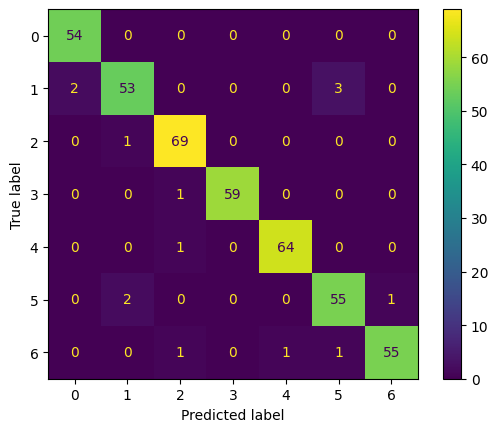

In [ ]:

from sklearn.ensemble import VotingClassifier


estimators = [
    ('dtc', modelo_dtc),
    ('knn', modelo_knn),
    ('svc', modelo_svc),
]

# Create de voting classifier (Hard Voting)
voting_clf_hard = VotingClassifier(estimators=estimators, voting='hard')
hard_ensemble = model_analysis(voting_clf_hard, {})



To use **soft voting** in a Voting Classifier, all models must be able to generate class probabilities using `predict_proba()`. However, `SVC` in scikit-learn does not have this enabled by default. You can activate it with `SVC(probability=True)`.

Instead of computing probabilities directly, `SVC` then follows an additional process involving **Platt Scaling**, a probability calibration technique. This makes the process slower.

A faster workaround is to use `CalibratedClassifierCV` to train an SVM and calibrate its probabilities more efficiently:


Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {}
 - Mejor precisión en validación cruzada: 0.9727

--- Evaluación para Clasificación ---
- Accuracy: 0.9693
- Precision: 0.9696
- Recall: 0.9693
- F1-score: 0.9689

Matriz de Confusión:


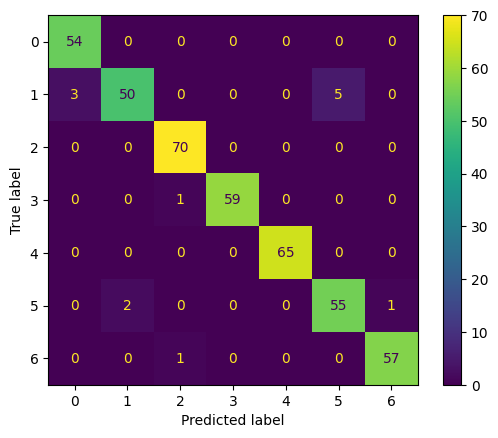

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# rejilla = {'C':[0.1,1,10,100], 'kernel':['linear','rbf','sigmoid'],'gamma':[0.01,0.1,0.2,0.3],'degree':[2,3,4],'coef0':[0.1,0.5,1.0]}
# modelo_svc_probability_true = model_analysis(probability=True), rejilla


# Wrap the SVC model using CalibratedClassifierCV to calibrate probabilities using cross-validation
modelo_svc_calibrated = CalibratedClassifierCV(modelo_svc, method='sigmoid')
estimators = [
    ('dtc', modelo_dtc),
    ('knn', modelo_knn),
    ('svc', modelo_svc_calibrated),
]

# Create soft voting classifier (Soft Voting)
voting_clf_soft = VotingClassifier(estimators=estimators, voting='soft')
soft_ensemble = model_analysis(voting_clf_soft, {})


### Explanation of Metrics

#### Accuracy

Measures the percentage of correct predictions over the total number of cases. It is useful when classes are **balanced**, but can be misleading if there is class imbalance.

- **Good when classes are balanced.**  
- **Misleading if one class has significantly more samples than the other.**  

---

#### Precision

Indicates how many of the instances predicted as positive are **actually positive**. It is useful when **false positives are costly** (e.g., in spam detection).

- **Important when false positives must be avoided (e.g., medical diagnosis, fraud detection).**  
- **Can be high even if the model misses many actual positives.**  

---

#### Recall

Measures how many of the **actual positive instances** were correctly identified. It is useful when **false negatives are costly** (e.g., cancer detection).

- **Critical when false negatives are dangerous (e.g., security breaches, serious illnesses).**  
- **Can be high if the model classifies many cases as positive.**  

---

#### F1-score (Balance between Precision and Recall)

It is the **harmonic mean** of **Precision and Recall**, making it useful when a balance between both is desired.

- **Ideal when there is class imbalance and we need to balance precision and recall.**  
- **Less intuitive than Accuracy.**  



### Comparison of metrics obtained

#### With out using  Leave one out
</table>
<table>
  <tr>
      <th> Model</th>
      <th> Accuracy</th>
      <th> Precision </th>
      <th> Recall </th>
      <th> F1 Score </th>
  </tr>
  <tr>
    <td> DecisionTreeClassifier</td>
    <td>0.9409 </td>
    <td>0.9421 </td>
    <td>0.9409 </td>
    <td>0.9411 </td>
  </tr>

  <tr>
    <td> KNeighborsClassifier </td>
    <td>0.8818 </td>
    <td>0.8806 </td>
    <td>0.8818 </td>
    <td>0.8802 </td>
  </tr>


  <tr>
    <td> SVC  🥉 </td>
    <td> 0.9598 </td>
    <td>0.9606 </td>
    <td>0.9598 </td>
    <td>0.9597 </td>
  </tr>


</table>

#### Using Leave one out
<table>
  <tr>
     <th> Model</th>
      <th> Accuracy</th>
      <th> Precision </th>
      <th> Recall </th>
      <th> F1 Score </th>
  </tr>
  
  <tr>
    <td> DecisionTreeClassifier </td>
    <td>0.9409 </td>
    <td>0.9425 </td>
    <td>0.9409 </td>
    <td>0.9413 </td>
  </tr>

  <tr>
    <td> KNeighborsClassifier </td>
    <td> 0.8629 </td>
    <td>0.8611 </td>
    <td>0.8629 </td>
    <td>0.8610 </td>
  </tr>

  <tr>
    <td> SVC </td>
    <td colspan="4">Tarda demasiado tiempo. ⏰ </td>
  </tr>

</table>

#### Ensemble
<table>
  <tr>
    <th>Voting mode</th>
    <th>Accuracy </th>
    <th> Precision </th>
    <th> Recall </th>
    <th> F1 Score </th>
  </tr>
  <tr>
    <td>Hard voting 🥈</td>
    <td> 0.9669 </td>
    <td> 0.9671 </td>
    <td> 0.9669 </td>
    <td> 0.9668 </td>
  </tr>
   <tr>
    <td>Soft voting 🥇</td>
    <td> 0.9716  </td>
    <td> 0.9721 </td>
    <td> 0.9716 </td>
    <td> 0.9715 </td>
  </tr>

  
</table>


---

### Conclusion

In this study, three classification models were evaluated: Decision Trees, K-Nearest Neighbors (KNN), and Support Vector Machines (SVC), both individually and combined in an Ensemble using hard and soft voting. Additionally, metrics were compared with and without the Leave-One-Out technique.

- **SVC** achieved the best individual performance without Leave-One-Out, reaching an Accuracy of **0.9598**, but was not feasible with Leave-One-Out due to processing time.

- **Decision Trees** showed consistent performance in both scenarios, with an Accuracy of **0.9409**, proving to be a balanced option between performance and computation time.

- **KNN** had lower performance compared to the other models, with an Accuracy of **0.8818** without Leave-One-Out and **0.8629** with it, indicating greater sensitivity to changes in the training data.

- **Soft Voting** was the best method, achieving an Accuracy of **0.9716**, outperforming any individual model.

- **Hard Voting** also showed solid performance (**0.9669**), although slightly lower than the soft voting approach.

In conclusion, the **Ensemble with Soft Voting** is the best strategy to maximize model accuracy and robustness, by combining the strengths of each individual classifier. For scenarios where computation time is critical, **Decision Trees** offer a good balance.
